In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm_notebook
import seaborn as sns

# ---------- Split ----------

In [22]:
cut = pd.read_csv('2011 자를거.csv')
cut.head()

,Date time,Maximum Temperature,Precipitation
0,05-26-2011,4,0
1,05-27-2011,5,0
2,05-28-2011,5,0
3,05-29-2011,5,0
4,05-30-2011,7,1


In [23]:
def split_date(x):
    return x['Date time'].split('-')[0].split('-')[0].strip()
cut['MM']=cut.apply(split_date, axis=1)

In [24]:
def split_date(x):
    return x['Date time'].split('-')[1].split('-')[0].strip()
cut['DD']=cut.apply(split_date, axis=1)

In [25]:
def split_date(x):
    return x['Date time'].split('-')[2].split('-')[0].strip()
cut['YY']=cut.apply(split_date, axis=1)

In [26]:
cut.head()

,Date time,Maximum Temperature,Precipitation,MM,DD,YY
0,05-26-2011,4,0,05,26,2011
1,05-27-2011,5,0,05,27,2011
2,05-28-2011,5,0,05,28,2011
3,05-29-2011,5,0,05,29,2011
4,05-30-2011,7,1,05,30,2011


In [27]:
cut.to_csv('2011 자름_coney.csv')

# ---------- LinearRegression ----------

# ---------- 종합 ----------

In [23]:
data = pd.read_csv('Beach_Test.csv')
print(data.shape)
data.head()

(1712, 10)


,YY,MM,DD,MT,Precipitation,DOTW,W(DOE),PH,Location,Attendance
0,2017,5,27,71,1,6,1,0,0,30000
1,2017,5,28,70,0,0,1,0,0,49000
2,2017,5,29,61,1,1,0,1,0,2100
3,2017,5,30,59,0,2,0,0,0,1000
4,2017,5,31,78,0,3,0,0,0,2300


In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[ : , : 9], data['Attendance'], random_state= 2)

In [87]:
model = LinearRegression().fit(X_train, Y_train)

In [88]:
model.score(X_train, Y_train)

0.15770390097681133

In [89]:
model.score(X_test, Y_test)

0.09043323001091164

# ---------- 기존데이터 ----------

In [180]:
data2 = pd.read_csv('Coney_Island_Linear_FixVersion.csv')
print(data2.shape)
data2.head()

(214, 9)


,YY,MM,DD,MT,Precipitation,DOTW,W(DOE),PH,Attendance
0,2017,5,27,71,1,6,1,0,30000
1,2017,5,28,70,0,0,1,0,49000
2,2017,5,29,61,1,1,0,1,2100
3,2017,5,30,59,0,2,0,0,1000
4,2017,5,31,78,0,3,0,0,2300


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(data2.iloc[ : , : 8], data2['Attendance'], random_state= 4)

In [66]:
model2 = LinearRegression().fit(X_train2, Y_train2)

In [67]:
model2.score(X_train2, Y_train2)

0.2894962149498327

In [68]:
model2.score(X_test2, Y_test2)

0.06538029646173471

In [81]:
for i in range(1, 100): # 68
    X_train, X_test, Y_train, Y_test = train_test_split(data2.iloc[ : , : 8], data2['Attendance'], random_state= i)
    Coney_TT_lr_model = LinearRegression().fit(X_train, Y_train)
    Train_Score = round(Coney_TT_lr_model.score(X_train, Y_train), 3) * 100 
    Test_Score = round(Coney_TT_lr_model.score(X_test, Y_test), 3) * 100 
    if(Train_Score > 0.25 and 0 < (Train_Score-Test_Score)< 7):
        print("i:{}, 훈련값:{}%, 테스트값:{}%,오차:{}%".format(i, Train_Score, Test_Score, round(Train_Score-Test_Score, 3)))

i:11, 훈련값:24.8%, 테스트값:20.200000000000003%,오차:4.6%
i:17, 훈련값:28.199999999999996%, 테스트값:23.3%,오차:4.9%
i:33, 훈련값:28.4%, 테스트값:26.0%,오차:2.4%
i:68, 훈련값:29.299999999999997%, 테스트값:23.400000000000002%,오차:5.9%
i:69, 훈련값:25.8%, 테스트값:19.6%,오차:6.2%
i:79, 훈련값:24.8%, 테스트값:20.5%,오차:4.3%
i:90, 훈련값:28.000000000000004%, 테스트값:23.1%,오차:4.9%
i:98, 훈련값:28.799999999999997%, 테스트값:25.4%,오차:3.4%


In [112]:
Coney = pd.read_csv('Coney_Island_Linear_FixVersion.csv')
Coney_predict = pd.read_csv('Coney_Predict.csv')
print("Coney : {}, Coney_predict : {}".format(Coney.shape, Coney_predict.shape))

Coney : (216, 9), Coney_predict : (648, 9)


In [113]:
Coney_TT = pd.read_csv('Coney_Island_Linear_TestVersion.csv')

# ------------------------------------------------------------------------------------

# 가상데이터 제작을 위한 모델 데이터의 높은 정확도를 보이는 시드값 계산

In [2]:
data = pd.read_csv("Wolfe's_Pond_Final.csv")
print(data.shape)
data.head()

(1078, 9)


,YY,MM,DD,MT,Precipitation,DOTW,W(DOE),PH,Attendance
0,2009,5,26,68,0,2,0,0,833
1,2009,5,27,67,0,3,0,0,786
2,2009,5,28,63,0,4,0,0,700
3,2009,5,29,75,1,5,0,0,676
4,2009,5,30,79,0,6,1,0,983


In [3]:
for i in range(0, 101): # 68
    X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[ : , : 8], data['Attendance'], random_state= i)
    data_model = LinearRegression().fit(X_train, Y_train)
    Train_Score = round(data_model.score(X_train, Y_train), 3) * 100 
    Test_Score = round(data_model.score(X_test, Y_test), 3) * 100 
    if(Train_Score > 0.25 and 3 < (Train_Score-Test_Score)< 6):
        print("i:{}, 훈련값:{}%, 테스트값:{}%,오차:{}%".format(i, Train_Score, Test_Score, round(Train_Score-Test_Score, 3)))

i:22, 훈련값:78.3%, 테스트값:74.9%,오차:3.4%
i:48, 훈련값:78.7%, 테스트값:73.9%,오차:4.8%
i:59, 훈련값:79.0%, 테스트값:73.2%,오차:5.8%
i:80, 훈련값:78.60000000000001%, 테스트값:73.9%,오차:4.7%
i:88, 훈련값:78.5%, 테스트값:73.8%,오차:4.7%
i:100, 훈련값:78.10000000000001%, 테스트값:74.7%,오차:3.4%


# 모델데이터를 선형회귀 함수에 적용 (시드값 변경)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[ : , : 8], data['Attendance'], random_state= 48)
model = LinearRegression().fit(X_train, Y_train)

# 예측데이터 불러오기, 적용하기

In [8]:
data_predict = pd.read_csv('Running_Test.csv')
print(data_predict.shape)
data_predict.head()

(1, 9)


,YY,MM,DD,MT,Precipitation,DOTW,W(DOE),PH,Attendance
0,2019,8,16,85,1,5,0,0,0


In [9]:
data_predict_feature = data_predict.iloc[:,:8]

In [10]:
pred = model.predict(data_predict_feature)
for i in range(0, pred.size):
    a = pred[i]
    print(a)

-55.5476549481682


# 10년 분량 데이터 정확도 확인

In [18]:
final = pd.read_csv("Manhattan_FinalTest.csv")
print(final.shape)
final.head()

(1078, 9)


,YY,MM,DD,MT,Precipitation,DOTW,W(DOE),PH,Attendance
0,2009,5,26,66,0,2,0,0,1828
1,2009,5,27,64,0,3,0,0,2312
2,2009,5,28,61,0,4,0,0,3008
3,2009,5,29,74,1,5,0,0,562
4,2009,5,30,76,0,6,1,0,538


In [19]:
for i in range(1, 100): # 68
    A_train, A_test, B_train, B_test = train_test_split(final.iloc[ : , : 8], final['Attendance'], random_state= i)
    final_model = LinearRegression().fit(A_train, B_train)
    Train_Score = round(final_model.score(A_train, B_train), 3) * 100 
    Test_Score = round(final_model.score(A_test, B_test), 3) * 100 
    if(Train_Score > 0.25 and 0 < (Train_Score-Test_Score)<= 3):
        print("i = {}, train = {}%, test = {}%, error = {}%".format(i, Train_Score, Test_Score, round(Train_Score-Test_Score, 3)))

i = 1, train = 64.5%, test = 62.3%, error = 2.2%
i = 7, train = 63.800000000000004%, test = 62.9%, error = 0.9%
i = 18, train = 63.7%, test = 63.5%, error = 0.2%
i = 31, train = 64.3%, test = 61.4%, error = 2.9%
i = 35, train = 64.0%, test = 62.7%, error = 1.3%
i = 55, train = 64.4%, test = 62.6%, error = 1.8%
i = 79, train = 64.5%, test = 62.5%, error = 2.0%
i = 90, train = 63.9%, test = 61.1%, error = 2.8%


# (Coney Island) i = 32, train = 59%, test = 54.8%, error = 4.2%

# (Rockaway)  i = 68, train = 68%, test = 63%, error = 5%

# (Midland) i = 42, train = 26% test = 20.9%, error = 5.1%

# (South Beach) i = 83, train = 55.3%, test = 49.9%, error = 5.4%

# (Wolfe's Pond) i = 48, train = 78.7%, test = 73.9%, error = 4.8%

# (Orchard) i = 89, train = 62.8%, test = 58.5%, error = 4.3%

# (Cedar Grove) i = 12, train = 3.2%, test = 0.3%, error = 2.9% (의미 없음)

# (Manhattan) i = 90, train = 63.9%, test = 61.1%, error = 2.8%

In [104]:
a.size

1

In [ ]:
def split(x):
    return x['Date time'].split('-')[0].split('-')[0].strip()
cut['MM']=cut.apply(split, axis=1)

In [44]:
for i in range(1, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(Coney.iloc[ : , : 8], Coney['Attendance'], random_state= i)
    Coney_lr_model = LinearRegression().fit(X_train, Y_train)
    Train_Score = round(Coney_lr_model.score(X_train, Y_train), 3) * 100 
    Test_Score = round(Coney_lr_model.score(X_test, Y_test), 3) * 100 
    print("i:{}, 훈련값:{}%, 테스트값:{}%, 훈련값이 더 큰가?{}, 오차:{}%".format(i, Train_Score, Test_Score, 
                                                                            Train_Score > Test_Score,
                                                                           round(Train_Score-Test_Score, 3)))

i:1, 훈련값:34.2%, 테스트값:50.8%, 훈련값이 더 큰가?False, 오차:-16.6%
i:2, 훈련값:39.5%, 테스트값:34.8%, 훈련값이 더 큰가?True, 오차:4.7%
i:3, 훈련값:42.9%, 테스트값:16.2%, 훈련값이 더 큰가?True, 오차:26.7%
i:4, 훈련값:40.300000000000004%, 테스트값:25.1%, 훈련값이 더 큰가?True, 오차:15.2%
i:5, 훈련값:37.6%, 테스트값:38.1%, 훈련값이 더 큰가?False, 오차:-0.5%
i:6, 훈련값:38.5%, 테스트값:36.3%, 훈련값이 더 큰가?True, 오차:2.2%
i:7, 훈련값:43.5%, 테스트값:10.299999999999999%, 훈련값이 더 큰가?True, 오차:33.2%
i:8, 훈련값:42.699999999999996%, 테스트값:22.8%, 훈련값이 더 큰가?True, 오차:19.9%
i:9, 훈련값:34.8%, 테스트값:42.6%, 훈련값이 더 큰가?False, 오차:-7.8%
i:10, 훈련값:42.6%, 테스트값:21.0%, 훈련값이 더 큰가?True, 오차:21.6%
i:11, 훈련값:39.4%, 테스트값:33.300000000000004%, 훈련값이 더 큰가?True, 오차:6.1%
i:12, 훈련값:37.3%, 테스트값:39.6%, 훈련값이 더 큰가?False, 오차:-2.3%
i:13, 훈련값:41.4%, 테스트값:21.7%, 훈련값이 더 큰가?True, 오차:19.7%
i:14, 훈련값:46.0%, 테스트값:10.100000000000001%, 훈련값이 더 큰가?True, 오차:35.9%
i:15, 훈련값:38.6%, 테스트값:34.2%, 훈련값이 더 큰가?True, 오차:4.4%
i:16, 훈련값:36.9%, 테스트값:41.199999999999996%, 훈련값이 더 큰가?False, 오차:-4.3%
i:17, 훈련값:30.4%, 테스트값:57.599999999999994%, 훈련값이 더 큰가?False,

In [636]:
staten_lr_model = LinearRegression().fit(X_train, Y_train)

In [637]:
staten_lr_model.score(X_train, Y_train)

0.3422369541491125

In [638]:
staten_lr_model.score(X_test, Y_test)

0.3073184165817221

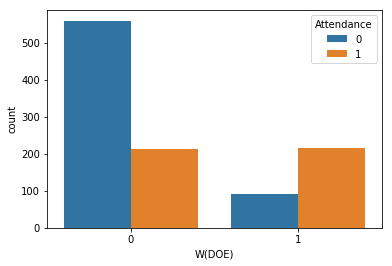

In [9]:
sns.countplot(data=view, x='W(DOE)', hue='Attendance')

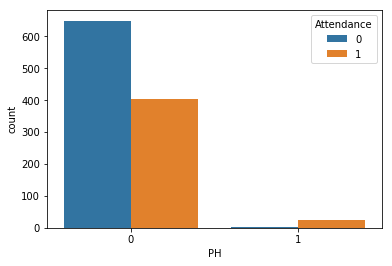

In [13]:
sns.countplot(data=view, x='PH', hue='Attendance')

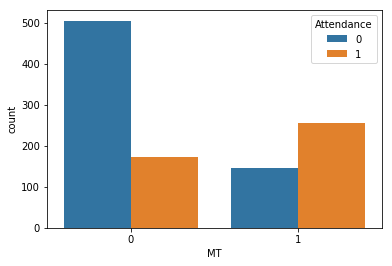

In [14]:
sns.countplot(data=view, x='MT', hue='Attendance')

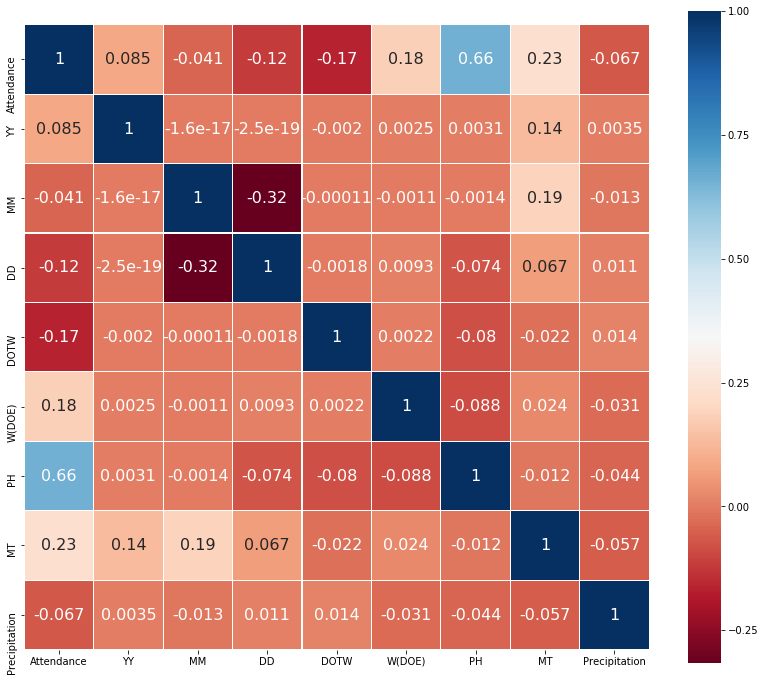

In [12]:
map_data = final[['Attendance', "YY", 'MM', 'DD', 'DOTW', 'W(DOE)', 'PH', 'MT', 'Precipitation']] 
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
sns.heatmap(map_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
del map_data

# ---------- DecisionTree ----------

In [229]:
coney = pd.read_csv('Coney_Island.csv')
coney.head()

,Minimum Temperature,Maximum Temperature,Temperature,Precipitation,Wind Speed,Wind Gust,Sea Level Pressure,DD,MM,Day Of The Week,Weekday or Weekend,A Public Hoilday,Attendance
0,61.0,70.9,66.1,0.1,8.8,62.2,1011.2,27,5,6,1,0,30000
1,59.0,70.1,64.0,0.0,13.7,44.7,1013.5,28,5,0,1,0,49000
2,57.2,61.1,58.8,0.1,13.6,40.3,1014.6,29,5,1,0,1,2100
3,56.0,59.1,57.8,0.0,10.3,43.0,1020.3,30,5,2,0,0,1000
4,57.8,78.0,65.7,0.0,10.1,43.0,1015.9,31,5,3,0,0,2300


In [230]:
coney.iloc[ : , : 12].head()

,Minimum Temperature,Maximum Temperature,Temperature,Precipitation,Wind Speed,Wind Gust,Sea Level Pressure,DD,MM,Day Of The Week,Weekday or Weekend,A Public Hoilday
0,61.0,70.9,66.1,0.1,8.8,62.2,1011.2,27,5,6,1,0
1,59.0,70.1,64.0,0.0,13.7,44.7,1013.5,28,5,0,1,0
2,57.2,61.1,58.8,0.1,13.6,40.3,1014.6,29,5,1,0,1
3,56.0,59.1,57.8,0.0,10.3,43.0,1020.3,30,5,2,0,0
4,57.8,78.0,65.7,0.0,10.1,43.0,1015.9,31,5,3,0,0


In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(coney.iloc[ : , : 12], coney['Attendance'], random_state=0)

In [238]:
for d in range(1,30):
    dt = DecisionTreeClassifier(max_depth = d, random_state=1)
    score = cross_val_score(dt, X_train, Y_train).mean()
    print("d:{}, score:{}".format(d, score))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:1, score:0.005050505050505051


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:2, score:0.007575757575757576


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:3, score:0.005050505050505051


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:4, score:0.005050505050505051


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:5, score:0.005050505050505051


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:6, score:0.005050505050505051


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:7, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:8, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:9, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:10, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:11, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:12, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:13, score:0.017676767676767676


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:14, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:15, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:16, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:17, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:18, score:0.017676767676767676


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:19, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:20, score:0.017676767676767676


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:21, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:22, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:23, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:24, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:25, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:26, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:27, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:28, score:0.0025252525252525255


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


d:29, score:0.0025252525252525255


In [239]:
man_dt_model = DecisionTreeClassifier(max_depth=13, random_state=0).fit(X_train, Y_train)

In [240]:
man_dt_model.score(X_train, Y_train)

0.94375

In [241]:
man_dt_model.score(X_test, Y_test)

0.018518518518518517

# ---------- RandomForest ----------

In [242]:
coney = pd.read_csv('Coney_Island.csv')
X_train, X_test, Y_train, Y_test = train_test_split(coney.iloc[ : , : 12], coney['Attendance'], random_state=0)

In [126]:
man.columns

Index(['Minimum Temperature', 'Maximum Temperature', 'Temperature',
       'Temperature AVG', 'Precipitation', 'DD', 'MM', 'Day Of The Week',
       'Weekday or Weekend', 'A Public Hoilday', 'Attendance'],
      dtype='object')

In [127]:
man.iloc[ : , : 10]

,Minimum Temperature,Maximum Temperature,Temperature,Temperature AVG,Precipitation,DD,MM,Day Of The Week,Weekday or Weekend,A Public Hoilday
0,61.0,70.9,66.1,65.95,1,27,5,6,1,0
1,59.0,70.1,64.0,64.55,0,28,5,0,1,0
2,57.2,61.1,58.8,59.15,1,29,5,1,0,1
3,56.0,59.1,57.8,57.55,0,30,5,2,0,0
4,57.8,78.0,65.7,67.90,0,31,5,3,0,0
5,61.9,79.8,70.6,70.85,1,1,6,4,0,0
6,61.1,77.9,69.1,69.50,0,2,6,5,0,0
7,57.7,76.8,66.7,67.25,1,3,6,6,1,0
8,59.0,69.1,64.2,64.05,0,4,6,0,1,0
9,58.5,68.0,63.7,63.25,1,5,6,1,0,0


In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(man.iloc[ : , : 10], man['Attendance'], random_state=0)

In [244]:
hyperparameter_list = []
for n_estimators in tqdm_notebook([100, 200, 300, 400, 500]):
    for max_features in [0.4, 0.5, 0.7, 0.8, 0.9]:
        for max_depth in range(1, 9):
            for min_samples_leaf in [10, 20, 30, 50, 70]:
                rf = RandomForestClassifier(n_estimators=n_estimators, 
                                            max_features=max_features, 
                                            max_depth=max_depth, 
                                            min_samples_leaf=min_samples_leaf)
                score = cross_val_score(rf, X_train, Y_train, cv = 3).mean()
                hyperparameter_list.append({'n_estimators' : n_estimators, 
                                            'max_features': max_features, 
                                            'max_depth' : max_depth, 
                                            'min_samples_leaf' : min_samples_leaf,
                                            'score':score})

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

In [245]:
hyperparameter_df = pd.DataFrame(hyperparameter_list)
hyperparameter_df.sort_values(by='score', ascending=False)

,max_depth,max_features,min_samples_leaf,n_estimators,score
962,1,0.9,30,500,0.113636
1,1,0.4,20,100,0.113636
144,5,0.8,70,100,0.073232
364,1,0.9,70,200,0.073232
98,4,0.7,50,100,0.073232
959,8,0.8,70,500,0.073232
549,6,0.8,70,300,0.073232
738,4,0.8,50,400,0.073232
229,6,0.4,70,200,0.073232
734,3,0.8,70,400,0.073232


In [247]:
hyperparameter_list = []
n_estimators = 500
max_depth = 1
min_samples_leaf = 30
for i in tqdm_notebook(range(100)):
    max_features= np.random.rand()
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                max_features=max_features, 
                                max_depth=max_depth, 
                                min_samples_leaf=min_samples_leaf)
    score = cross_val_score(rf, X_train, Y_train, cv = 3).mean()
    hyperparameter_list.append({'n_estimators' : n_estimators, 
                                'max_features': max_features, 
                                'max_depth' : max_depth, 
                                'min_samples_leaf' : min_samples_leaf,
                                'score':score})

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimu

In [248]:
hyperparameter_df = pd.DataFrame(hyperparameter_list)
hyperparameter_df.sort_values(by='score', ascending=False)

,max_depth,max_features,min_samples_leaf,n_estimators,score
40,1,0.875462,30,500,0.113636
4,1,0.733769,30,500,0.113636
59,1,0.946493,30,500,0.058081
30,1,0.765605,30,500,0.058081
80,1,0.986007,30,500,0.058081
79,1,0.896836,30,500,0.058081
85,1,0.968341,30,500,0.058081
34,1,0.810971,30,500,0.058081
96,1,0.438782,30,500,0.058081
18,1,0.160297,30,500,0.017677


In [249]:
man_rf_model = RandomForestClassifier(n_estimators=500, max_depth=1, max_features=0.875462, min_samples_leaf=30, random_state=0).fit(X_train, Y_train)

In [250]:
man_rf_model.score(X_train, Y_train)

0.0875

In [251]:
man_rf_model.score(X_test, Y_test)

0.0